# Contents

1. [Missing Values](#missing-values)
2. [Coding Practice](#coding-practice)
3. [Conclusion](#conclusion)


## <a id="missing-values"></a> Missing Values

## What is Missing Values?

    Missing values refer to the situation where some values are not present in a dataset. These missing values can occur due to various reasons during processes such as data collection and data processing. As we know, machine learning models typically work with numerical values. These missing values can lead to several issues during the modeling process, negatively affecting the model's performance.

    Missing values are represented by NaN (not a number), NULL, etc.

    There are several reasons why missing values may occur:

**1. Data Entry Errors:** Mistakes made during data collection or entry processes.

**2. Data Loss:** Technical issues or losses during data storage.

**3. Non-response:** Participants leaving certain questions unanswered in data collection methods like surveys or forms.

**4. Measurement Missing:** Failure to measure or record a specific feature.

Below is a screenshot of a dataset containing missing values.

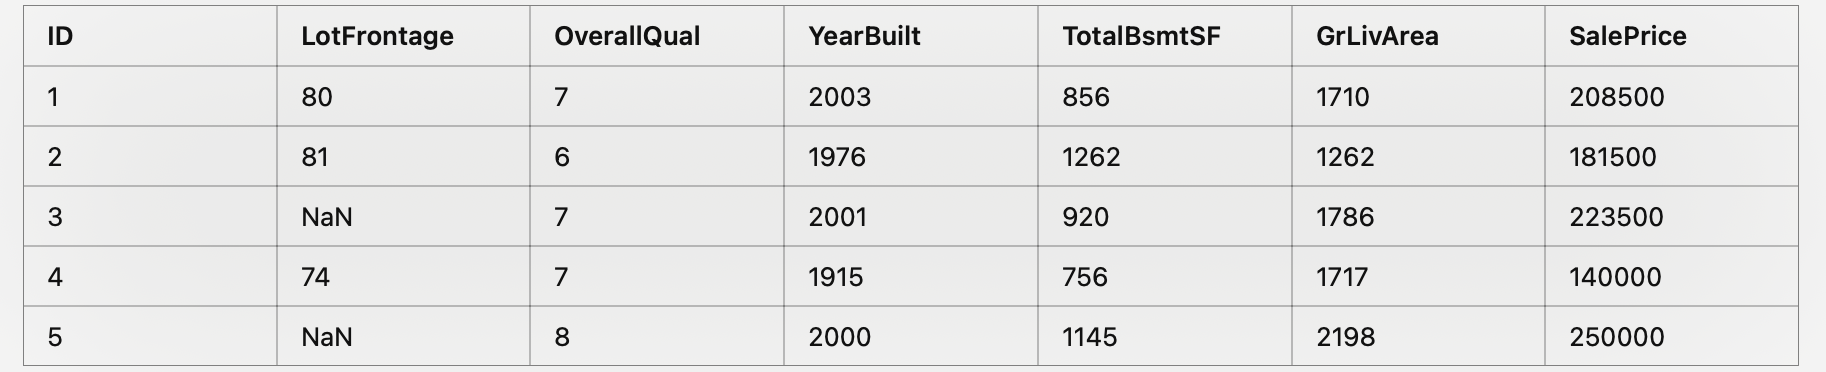

## Types of Missing Values

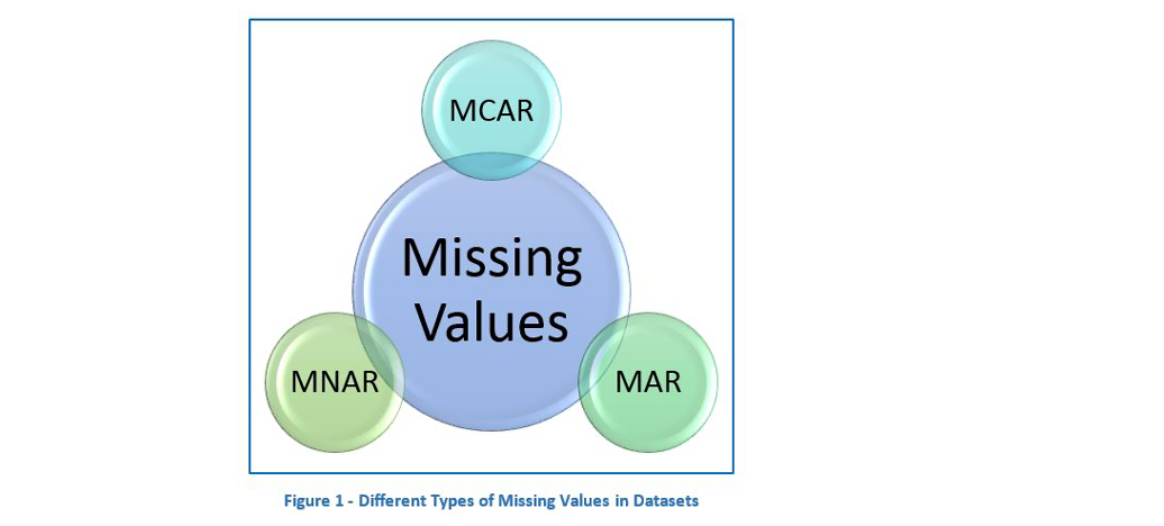

**MCAR:** Missing completely at random means that some values are missing randomly, indicating complete randomness. For example, in a survey, if some participants' responses are not recorded in a completely random manner, the missing data is considered MCAR.

**MAR:** Missing at random implies that the missing values are related to other data. For instance, in a health survey, older individuals may be more likely to leave some questions unanswered. In this case, the missing data is associated with other observed variables like age.

**MNAR:** Missing not at random suggests that the missing values are not random and are directly related to the data itself. It is the most challenging type for missing values imputation. For example, in an income survey, individuals with high incomes may have a low probability of reporting their incomes. In this scenario, the missing data is directly linked to the income level and is considered MNAR.

## Missing Values Handling Methods


**Deletion(not recommended):** Deleting rows or columns with missing values. It is a simple method but can lead to significant data loss if there are many missing values, which can be problematic during the modeling stage.


**Imputation:** Filling in missing data with another value. There are several types:

- Replacing missing values with the mean. (for numeric values)
- Replacing missing values with the median. (for numeric values that contains outliers)
- Replacing missing values with the mode. (for categoric values)
- Building a model to predict missing values.

**Forward Fill and Backward Fill:** These methods are often used for time series data.

**- Ffill:** This method fills missing values with the last observed value.
    
**- Bfill:** This method fills missing values with the next observed value.



## <a id="coding-practice"></a> Coding Practice


In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
# import data-set

data = pd.read_csv('/Users/data/Desktop/train.csv')
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [193]:
# At first step, we need to examine the missing values

In [194]:
# let's have a look at the missing values columns
missing_values = data.isna().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [195]:
#drop the column which does not contains missing values
data = data[missing_values.index]
data.dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [196]:
# have a  look at a new data-set
print(data.shape)
data.head()

(1460, 19)


,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,NaN,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,NaN,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN


In [197]:
# the all data set has 1460 rows. In this scenario, most of the values are missing in the following columns 
# Alley, PoolQC, Fence ve MiscFeature. Therefore we can drop these columns. It is also deletion part :)

columns_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']




In [198]:
data = data.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'])
data.nunique()

LotFrontage     110
MasVnrType        3
MasVnrArea      327
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Electrical        5
FireplaceQu       5
GarageType        6
GarageYrBlt      97
GarageFinish      3
GarageQual        5
GarageCond        5
dtype: int64

In [199]:
data.nunique()

LotFrontage     110
MasVnrType        3
MasVnrArea      327
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Electrical        5
FireplaceQu       5
GarageType        6
GarageYrBlt      97
GarageFinish      3
GarageQual        5
GarageCond        5
dtype: int64

In [200]:
data.isna().sum()

LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [201]:
data

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA
1,80.0,NaN,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA
2,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA
3,60.0,NaN,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA
4,84.0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA
1456,85.0,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA
1457,66.0,NaN,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA
1458,68.0,NaN,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA


In [202]:
# 
for column in ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']:
    print(f"{column} missing values before imputation: {data[column].isna().sum()}")
    data[column] = data[column].fillna(data[column].mean())
    print(f"{column} missing values after imputation: {data[column].isna().sum()}")

LotFrontage missing values before imputation: 259
LotFrontage missing values after imputation: 0
MasVnrArea missing values before imputation: 8
MasVnrArea missing values after imputation: 0
GarageYrBlt missing values before imputation: 81
GarageYrBlt missing values after imputation: 0


In [ ]:
# as you can see that we filled the numeric missing values. 

In [209]:
missing_values = data.isna().sum()
unique_values = data.nunique()
types = data.dtypes
display(HTML(f"""
<div style="display: flex;">
    <div style="margin-right: 20px;">
        <h4>Missing Values</h4>
        {missing_values.to_frame().to_html()}
    </div>
    <div style="margin-right: 20px;">
        <h4>Unique Values</h4>
        {unique_values.to_frame().to_html()}
    </div>
    <div style="margin-right: 20px;">
        <h4>Data Types</h4>
        {types.to_frame().to_html()}
    </div>
</div>
"""))

,0
LotFrontage,0
MasVnrType,872
MasVnrArea,0
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1
FireplaceQu,690


In [210]:
# for categorical features, we completed the filling missing values process using mode value

categorical_features = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

for feature in categorical_features:
    data[feature] = data[feature].fillna(data[feature].mode()[0])

In [211]:
missing_values = data.isna().sum()
unique_values = data.nunique()
types = data.dtypes
display(HTML(f"""
<div style="display: flex;">
    <div style="margin-right: 20px;">
        <h4>Missing Values</h4>
        {missing_values.to_frame().to_html()}
    </div>
    <div style="margin-right: 20px;">
        <h4>Unique Values</h4>
        {unique_values.to_frame().to_html()}
    </div>
    <div style="margin-right: 20px;">
        <h4>Data Types</h4>
        {types.to_frame().to_html()}
    </div>
</div>
"""))

,0
LotFrontage,0
MasVnrType,0
MasVnrArea,0
BsmtQual,0
BsmtCond,0
BsmtExposure,0
BsmtFinType1,0
BsmtFinType2,0
Electrical,0
FireplaceQu,0


## <a id="conclusion"></a> Conclusion


Choosing the appropriate method for handling missing values depends on the dataset and the nature of the missing data. Simple imputation methods (mean, median, mode) are quick and easy but may not always provide the most accurate results. Advanced techniques (regression, multiple imputation, KNN, machine learning algorithms) can offer more robust solutions but require more computational resources and expertise.